In [1]:
!pip install keras-tcn
!pip install keras-tcn --no-dependencies

     |████████████████████████████████| 1.1 MB 9.5 MB/s 
     |████████████████████████████████| 462 kB 35.0 MB/s 


In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

import keras 
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense 

from keras.layers import Dropout

from keras.layers import LSTM

from keras.layers import *


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping

from tcn import TCN, tcn_full_summary

In [3]:
df=pd.read_csv("MSFT.csv")
print("Number of rows and columns:", df.shape)
df.head(5)
training_set = df.iloc[:1100, 4:5].values

test_set = df.iloc[1100:, 4:5].values
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Number of rows and columns: (1503, 7)


DATA WINDOW 60

In [4]:

X_train60 = []
y_train60 = []
for i in range(60, 1100):
    X_train60.append(training_set_scaled[i-60:i, 0])
    y_train60.append(training_set_scaled[i, 0])
X_train60, y_train60 = np.array(X_train60), np.array(y_train60)
X_train60 = np.reshape(X_train60, (X_train60.shape[0], X_train60.shape[1], 1))

X_train60.shape

(1040, 60, 1)

TEST DATA WINDOW 60

In [5]:

dataset_train = df.iloc[:1100, 1:2]
dataset_test = df.iloc[1100:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)


463

In [6]:
X_test60 = []
for i in range(60, 463):
    X_test60.append(inputs[i-60:i, 0])
X_test60 = np.array(X_test60)
X_test60 = np.reshape(X_test60, (X_test60.shape[0], X_test60.shape[1], 1))
X_test60.shape

(403, 60, 1)

DATA WINDOW 1

In [7]:

X_train1 = []
y_train1 = []
for i in range(1, 1100):
    X_train1.append(training_set_scaled[i-1:i, 0])
    y_train1.append(training_set_scaled[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
X_train1.shape

(1099, 1, 1)

TEST DATA WINDOW 1

In [8]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

404

In [9]:

X_test1 = []
for i in range(1, 404):
    X_test1.append(inputs[i-1:i, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
print(X_test1.shape)

(403, 1, 1)


DATA WINDOW 30

In [10]:

X_train30 = []
y_train30 = []
for i in range(30, 1100):
    X_train30.append(training_set_scaled[i-30:i, 0])
    y_train30.append(training_set_scaled[i, 0])
X_train30, y_train30 = np.array(X_train30), np.array(y_train30)
X_train30 = np.reshape(X_train30, (X_train30.shape[0], X_train30.shape[1], 1))
X_train30.shape

(1070, 30, 1)

TEST DATA WINDOW 30

In [11]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

433

In [12]:

X_test30 = []
for i in range(30, 433):
    X_test30.append(inputs[i-30:i, 0])
X_test30 = np.array(X_test30)
X_test30 = np.reshape(X_test30, (X_test30.shape[0], X_test30.shape[1], 1))
print(X_test30.shape)

(403, 30, 1)


DATA WINDOW 90

In [13]:

X_train90 = []
y_train90 = []
for i in range(90, 1100):
    X_train90.append(training_set_scaled[i-90:i, 0])
    y_train90.append(training_set_scaled[i, 0])
X_train90, y_train90 = np.array(X_train90), np.array(y_train90)
X_train90 = np.reshape(X_train90, (X_train90.shape[0], X_train90.shape[1], 1))
X_train90.shape

(1010, 90, 1)

TEST DATA WINDOW 90

In [14]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

493

In [15]:

X_test90 = []
for i in range(90, 493):
    X_test90.append(inputs[i-90:i, 0])
X_test90 = np.array(X_test90)
X_test90 = np.reshape(X_test90, (X_test90.shape[0], X_test90.shape[1], 1))
print(X_test90.shape)

(403, 90, 1)


GRU 1

In [16]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train1.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train1, y_train1, epochs = 30, batch_size = 32)

Epoch 1/30
35/35 [==============================] - 7s 6ms/step - loss: 0.0549
Epoch 2/30
35/35 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 3/30
35/35 [==============================] - 0s 4ms/step - loss: 3.7300e-04
Epoch 4/30
35/35 [==============================] - 0s 5ms/step - loss: 2.3032e-04
Epoch 5/30
35/35 [==============================] - 0s 6ms/step - loss: 2.4780e-04
Epoch 6/30
35/35 [==============================] - 0s 6ms/step - loss: 2.2887e-04
Epoch 7/30
35/35 [==============================] - 0s 6ms/step - loss: 2.4714e-04
Epoch 8/30
35/35 [==============================] - 0s 5ms/step - loss: 2.4835e-04
Epoch 9/30
35/35 [==============================] - 0s 6ms/step - loss: 2.2873e-04
Epoch 10/30
35/35 [==============================] - 0s 6ms/step - loss: 2.4116e-04
Epoch 11/30
35/35 [==============================] - 0s 6ms/step - loss: 2.2176e-04
Epoch 12/30
35/35 [==============================] - 0s 5ms/step - loss: 2.2516e-04
Epoch 13/

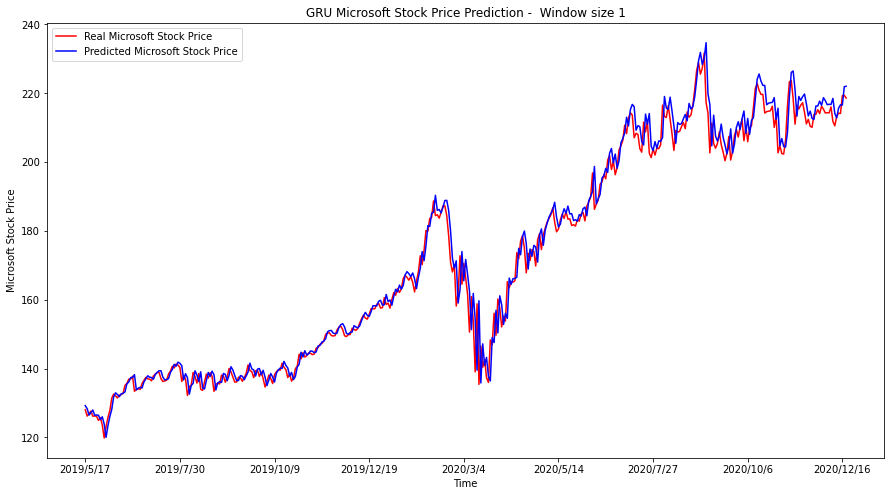

In [17]:
predicted_stock_price = model.predict(X_test1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Microsoft Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Microsoft Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU Microsoft Stock Price Prediction -  Window size 1')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show() 

In [18]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

2.758160152779932

In [19]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))

rmse

4.163015776805587

TCN 1

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train1.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train1, y_train1, epochs = 100, batch_size = 32)

Epoch 1/100
35/35 [==============================] - 8s 18ms/step - loss: 0.3397
Epoch 2/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0191
Epoch 3/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0121
Epoch 4/100
35/35 [==============================] - 0s 11ms/step - loss: 0.0105
Epoch 5/100
35/35 [==============================] - 0s 11ms/step - loss: 0.0082
Epoch 6/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0064
Epoch 7/100
35/35 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 8/100
35/35 [==============================] - 0s 11ms/step - loss: 0.0051
Epoch 9/100
35/35 [==============================] - 0s 11ms/step - loss: 0.0044
Epoch 10/100
35/35 [==============================] - 0s 11ms/step - loss: 0.0037
Epoch 11/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0032
Epoch 12/100
35/35 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 13/100
35/35 [======

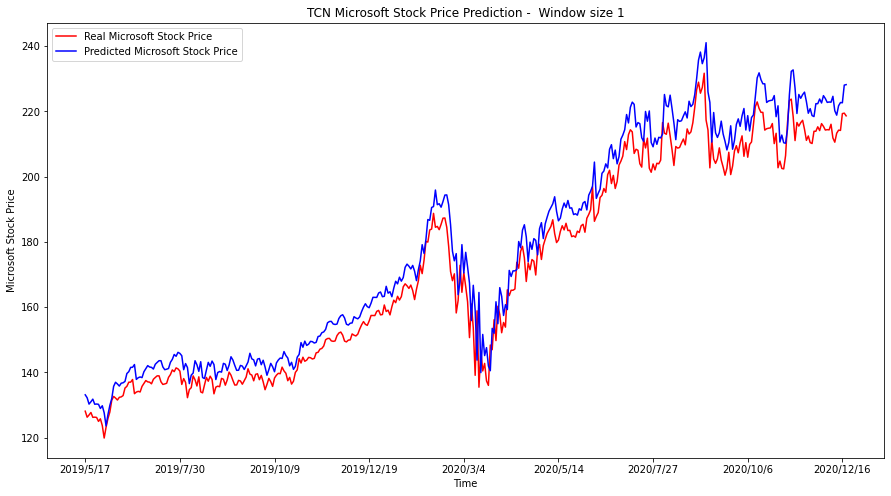

In [ ]:
predicted_stock_price = model.predict(X_test1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Microsoft Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Microsoft Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN Microsoft Stock Price Prediction -  Window size 1')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

6.390638124815835

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

7.429734319906366

GRU 30

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train30.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train30, y_train30, epochs = 30, batch_size = 32)

Epoch 1/30
34/34 [==============================] - 2s 10ms/step - loss: 0.0192
Epoch 2/30
34/34 [==============================] - 0s 8ms/step - loss: 5.2388e-04
Epoch 3/30
34/34 [==============================] - 0s 7ms/step - loss: 3.4061e-04
Epoch 4/30
34/34 [==============================] - 0s 7ms/step - loss: 3.3991e-04
Epoch 5/30
34/34 [==============================] - 0s 7ms/step - loss: 3.3444e-04
Epoch 6/30
34/34 [==============================] - 0s 7ms/step - loss: 3.1481e-04
Epoch 7/30
34/34 [==============================] - 0s 7ms/step - loss: 3.5762e-04
Epoch 8/30
34/34 [==============================] - 0s 7ms/step - loss: 3.7645e-04
Epoch 9/30
34/34 [==============================] - 0s 9ms/step - loss: 3.1411e-04
Epoch 10/30
34/34 [==============================] - 0s 10ms/step - loss: 3.1872e-04
Epoch 11/30
34/34 [==============================] - 0s 11ms/step - loss: 3.6243e-04
Epoch 12/30
34/34 [==============================] - 0s 11ms/step - loss: 3.3200e-04
E

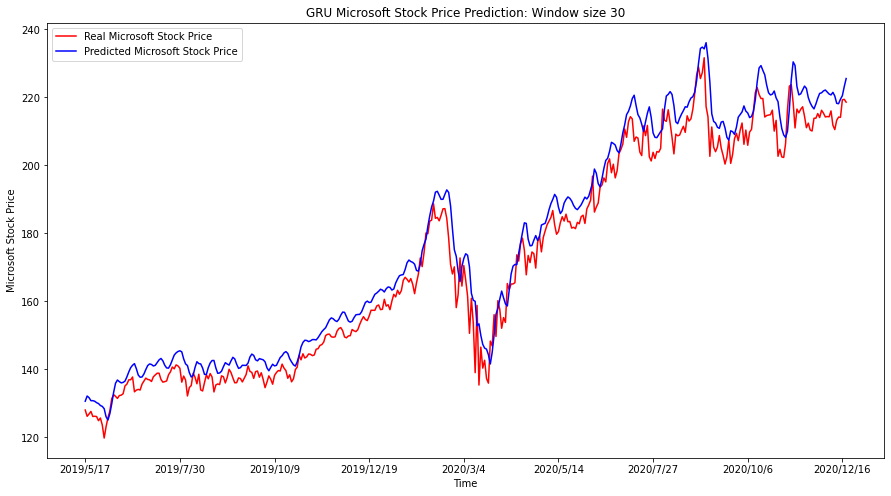

In [ ]:
predicted_stock_price = model.predict(X_test30)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Microsoft Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Microsoft Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU Microsoft Stock Price Prediction: Window size 30')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

5.2475943209376945

In [ ]:
rmse=math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

6.303317310072203

TCN 30

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train30.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train30, y_train30, epochs = 100, batch_size = 32)

Epoch 1/100
34/34 [==============================] - 3s 13ms/step - loss: 2.8298
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 0.0665
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0402
Epoch 4/100
34/34 [==============================] - 0s 8ms/step - loss: 0.0310
Epoch 5/100
34/34 [==============================] - 0s 8ms/step - loss: 0.0268
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0203
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 0.0174
Epoch 8/100
34/34 [==============================] - 0s 8ms/step - loss: 0.0157
Epoch 9/100
34/34 [==============================] - 0s 8ms/step - loss: 0.0149
Epoch 10/100
34/34 [==============================] - 0s 8ms/step - loss: 0.0141
Epoch 11/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0118
Epoch 12/100
34/34 [==============================] - 0s 8ms/step - loss: 0.0122
Epoch 13/100
34/34 [================

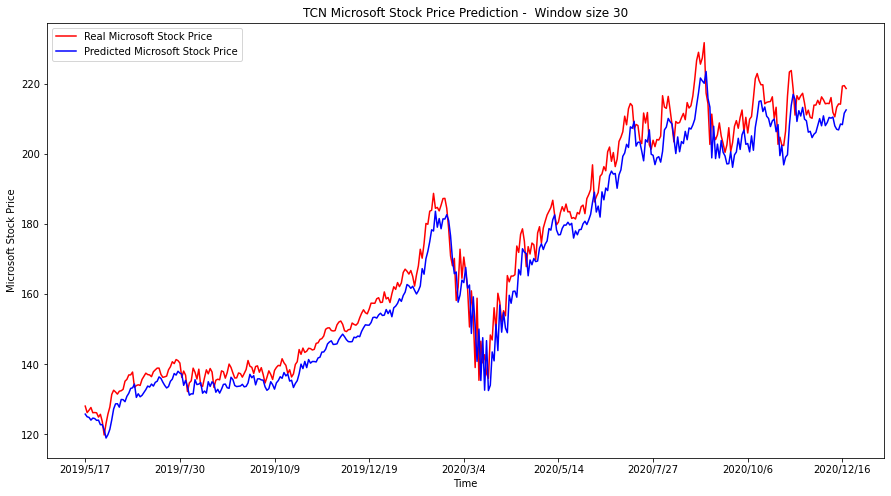

In [ ]:
predicted_stock_price = model.predict(X_test30)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Microsoft Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Microsoft Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN Microsoft Stock Price Prediction -  Window size 30')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

5.131990885892428

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

6.0901667317724

GRU 60

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train60.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train60, y_train60, epochs = 30, batch_size = 32)

Epoch 1/30
33/33 [==============================] - 2s 14ms/step - loss: 0.0135
Epoch 2/30
33/33 [==============================] - 0s 12ms/step - loss: 3.9135e-04
Epoch 3/30
33/33 [==============================] - 0s 11ms/step - loss: 3.3182e-04
Epoch 4/30
33/33 [==============================] - 0s 11ms/step - loss: 3.4424e-04
Epoch 5/30
33/33 [==============================] - 0s 12ms/step - loss: 3.1758e-04
Epoch 6/30
33/33 [==============================] - 0s 11ms/step - loss: 3.3798e-04
Epoch 7/30
33/33 [==============================] - 0s 11ms/step - loss: 3.0990e-04
Epoch 8/30
33/33 [==============================] - 0s 11ms/step - loss: 3.6044e-04
Epoch 9/30
33/33 [==============================] - 0s 12ms/step - loss: 3.2765e-04
Epoch 10/30
33/33 [==============================] - 0s 11ms/step - loss: 3.4447e-04
Epoch 11/30
33/33 [==============================] - 0s 11ms/step - loss: 3.1232e-04
Epoch 12/30
33/33 [==============================] - 0s 12ms/step - loss: 2.76

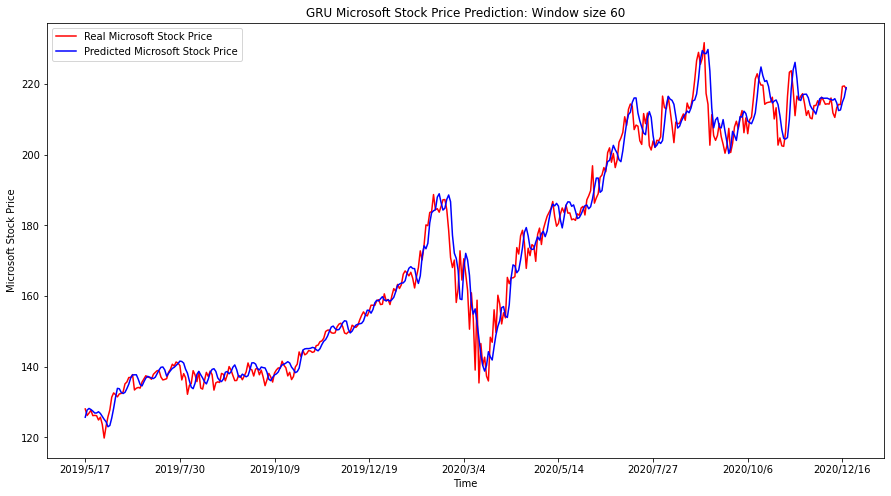

In [ ]:
predicted_stock_price = model.predict(X_test60)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Microsoft Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Microsoft Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU Microsoft Stock Price Prediction: Window size 60')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

3.076953658962808

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price, y))
rmse

4.400026895079196

TCN 60

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train60.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train60, y_train60, epochs = 100, batch_size = 32)

Epoch 1/100
33/33 [==============================] - 2s 10ms/step - loss: 2.0365
Epoch 2/100
33/33 [==============================] - 0s 8ms/step - loss: 0.1109
Epoch 3/100
33/33 [==============================] - 0s 8ms/step - loss: 0.0711
Epoch 4/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 5/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0457
Epoch 6/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0335
Epoch 7/100
33/33 [==============================] - 0s 8ms/step - loss: 0.0269
Epoch 8/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0219
Epoch 9/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0188
Epoch 10/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0183
Epoch 11/100
33/33 [==============================] - 0s 8ms/step - loss: 0.0153
Epoch 12/100
33/33 [==============================] - 0s 8ms/step - loss: 0.0148
Epoch 13/100
33/33 [================

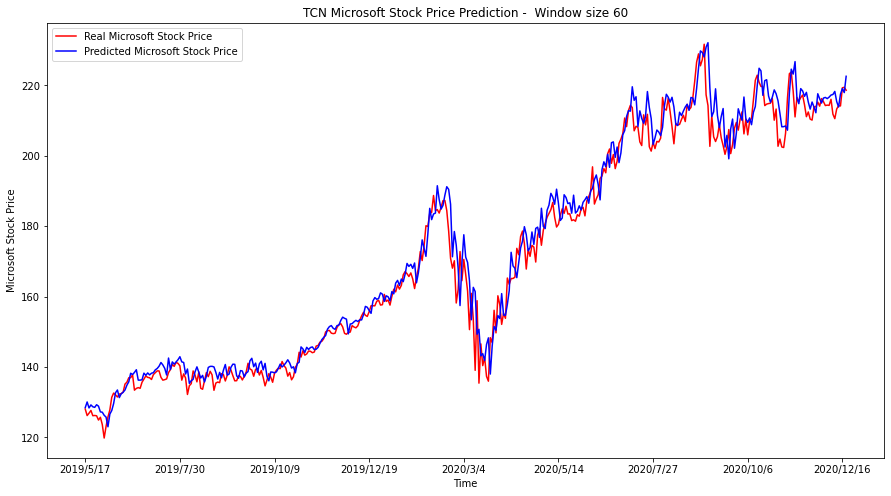

In [ ]:
predicted_stock_price = model.predict(X_test60)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Microsoft Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Microsoft Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN Microsoft Stock Price Prediction -  Window size 60')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price,y)
abse

3.4088835467514143

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

4.825646728574542

GRU 90

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train90.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train90, y_train90, epochs = 30, batch_size = 32)

Epoch 1/30
32/32 [==============================] - 2s 20ms/step - loss: 0.0151
Epoch 2/30
32/32 [==============================] - 1s 16ms/step - loss: 5.0078e-04
Epoch 3/30
32/32 [==============================] - 1s 16ms/step - loss: 3.6515e-04
Epoch 4/30
32/32 [==============================] - 1s 16ms/step - loss: 3.4775e-04
Epoch 5/30
32/32 [==============================] - 1s 16ms/step - loss: 3.7063e-04
Epoch 6/30
32/32 [==============================] - 1s 16ms/step - loss: 3.3303e-04
Epoch 7/30
32/32 [==============================] - 1s 16ms/step - loss: 2.8779e-04
Epoch 8/30
32/32 [==============================] - 1s 17ms/step - loss: 3.2493e-04
Epoch 9/30
32/32 [==============================] - 1s 18ms/step - loss: 3.6473e-04
Epoch 10/30
32/32 [==============================] - 1s 17ms/step - loss: 4.4549e-04
Epoch 11/30
32/32 [==============================] - 1s 17ms/step - loss: 3.4825e-04
Epoch 12/30
32/32 [==============================] - 1s 17ms/step - loss: 3.60

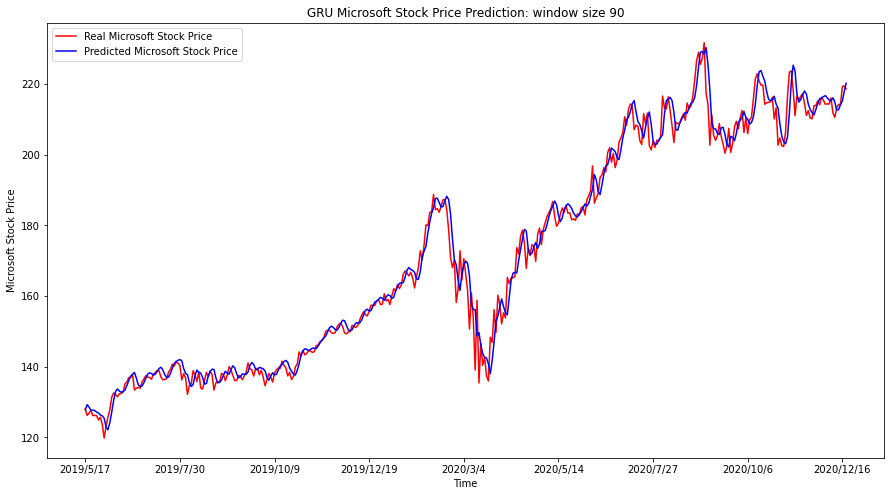

In [ ]:
predicted_stock_price = model.predict(X_test90)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Microsoft Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Microsoft Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU Microsoft Stock Price Prediction: window size 90')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

2.614149945911038

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

3.845917318988285

TCN 90

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=5, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train90.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train90, y_train90, epochs = 100, batch_size = 32)

Epoch 1/100
32/32 [==============================] - 3s 17ms/step - loss: 10.2290
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.2447
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.1271
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0930
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0837
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0605
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0534
Epoch 8/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0433
Epoch 9/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0362
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0356
Epoch 11/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0339
Epoch 12/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0363
Epoch 13/100
32/32 [===============

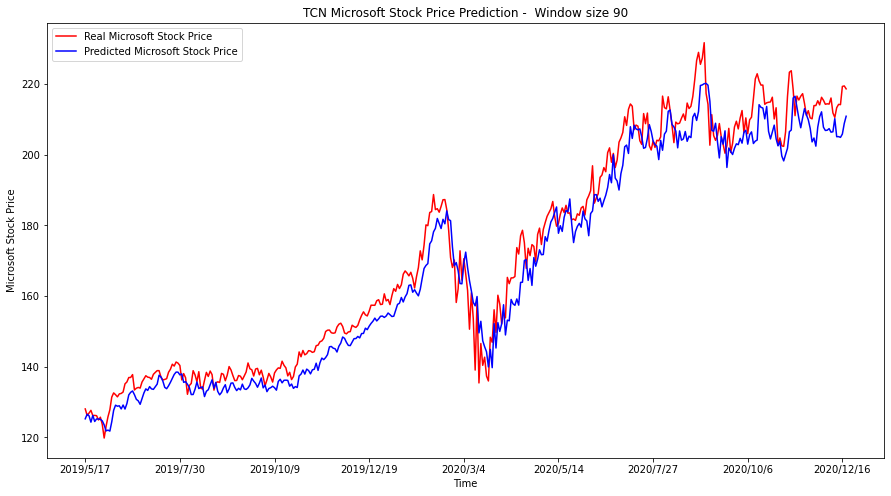

In [ ]:
predicted_stock_price = model.predict(X_test90)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Microsoft Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Microsoft Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN Microsoft Stock Price Prediction -  Window size 90')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

5.118075625268979

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

6.225266515397279